In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_config = pd.read_csv("wandb_runs/wandb_configs.csv",
                        usecols=['Name',
                                 'entropy_tuning',
                                 'puck_closeness_reward_multiplier', 
                                 'puck_not_touched_yet_reward', 
                                 'tau'])

# rename entropy_tuning to more correct values
mapping = {
    'fixed': 'exp annealing',
    'none': 'constant',
}
df_config['entropy_tuning'] = df_config['entropy_tuning'].replace(mapping)
df_config

,Name,entropy_tuning,puck_closeness_reward_multiplier,puck_not_touched_yet_reward,tau
0,2025-02-19_19-02-11,adaptive,1,0.0,1.000
1,2025-02-19_19-02-08,adaptive,1,0.0,1.000
2,2025-02-19_19-02-01,exp annealing,1,0.0,1.000
3,2025-02-19_19-01-57,exp annealing,1,0.0,1.000
4,2025-02-19_19-01-48,adaptive,5,0.0,1.000
5,2025-02-19_19-01-43,exp annealing,5,0.0,1.000
6,2025-02-19_01-07-44,exp annealing,5,0.0,1.000
7,2025-02-18_23-53-26,adaptive,5,0.0,1.000
8,2025-02-18_23-51-47,adaptive,5,-0.1,1.000
9,2025-02-18_23-51-39,adaptive,5,-0.1,1.000


In [3]:
def get_outcomes(path):
	df = pd.read_csv(path)
	# Exclude MIN, MAX and Step columns
	df = df.loc[:, ~df.columns.str.contains('__MIN|__MAX|Step')]

	# Extract date from column names
	df.columns = df.columns.str.extract(r'(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})')[0]

	# Convert from wide to long format
	df_long = df.T
	df_long.index.name = 'Name'  
	df_long = df_long.reset_index()
	return df_long

df_weak = get_outcomes("wandb_runs/wandb_weak_wins.csv")
df_strong = get_outcomes("wandb_runs/wandb_strong_wins.csv")
print(df_weak.shape)
df_weak.head()

(37, 10001)


,Name,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2025-02-19_19-02-11,0,0,0,0,0,0,1,1,1,...,49,49,49,49,49,49,49,49,49,49
1,2025-02-19_19-02-08,0,0,0,0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
2,2025-02-19_19-02-01,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,2025-02-19_19-01-57,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,2025-02-19_19-01-48,0,0,0,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,45,45


In [4]:
# Overview of the runs
df_grouped = df_config.groupby(['entropy_tuning', 'puck_closeness_reward_multiplier', 'puck_not_touched_yet_reward', 'tau']).size().reset_index(name='count')
df_grouped

,entropy_tuning,puck_closeness_reward_multiplier,puck_not_touched_yet_reward,tau,count
0,adaptive,1,-0.1,0.005,4
1,adaptive,1,-0.1,1.000,2
2,adaptive,1,0.0,0.005,2
3,adaptive,1,0.0,1.000,2
4,adaptive,5,-0.1,0.005,3
5,adaptive,5,-0.1,1.000,2
6,adaptive,5,0.0,0.005,3
7,adaptive,5,0.0,1.000,2
8,constant,1,-0.1,0.005,3
9,exp annealing,1,-0.1,0.005,4


In [5]:
df_weak_merged = df_config.merge(df_weak, on='Name', how='inner')
df_strong_merged = df_config.merge(df_strong, on='Name', how='inner')
df_weak_merged.head()

,Name,entropy_tuning,puck_closeness_reward_multiplier,puck_not_touched_yet_reward,tau,0,1,2,3,4,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,2025-02-19_19-02-11,adaptive,1,0.0,1.0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
1,2025-02-19_19-02-08,adaptive,1,0.0,1.0,0,0,0,0,0,...,49,49,49,49,49,49,49,49,49,49
2,2025-02-19_19-02-01,exp annealing,1,0.0,1.0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
3,2025-02-19_19-01-57,exp annealing,1,0.0,1.0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
4,2025-02-19_19-01-48,adaptive,5,0.0,1.0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,45,45


In [6]:
def get_fixed_params(df, fixed_params):
	df_fix = df.copy()
	for param, value in fixed_params.items():
		df_fix = df_fix[df_fix[param].isin(value)]
	return df_fix

In [7]:
def get_mean_and_std(df, group_by):
	numeric_col_names = [col for col in df.columns if str(col).isdigit()]

	df_numeric_cols = df[numeric_col_names]
	
	return df_numeric_cols.groupby(group_by, as_index=True).agg(['mean', 'std'])

In [25]:
def plot_mean_and_std(df, title, x_label, y_label, legend_title, fontsize=20):	
	# Extract means and standard deviations using MultiIndex
	df_means = df.xs('mean', axis=1, level=1)  # Extract only 'mean' values
	df_stds = df.xs('std', axis=1, level=1)    # Extract only 'std' values

	plt.figure(figsize=(10, 6))

	# Iterate over each index
	for idx in df_means.index:
		mean_values = df_means.loc[idx].values
		std_values = df_stds.loc[idx].values
		mean_values *= 2
		std_values *= 2
		steps = df_means.columns.astype(int)  # Convert step indices to integers

		# Plot mean line
		plt.plot(steps, mean_values, label=f"{idx}")

		# Fill between (Mean ± Std)
		plt.fill_between(steps, mean_values - std_values, mean_values + std_values, alpha=0.2)

	# y-axis limits
	plt.ylim(0, 100)

	# Customize the plot
	plt.xlabel(x_label, fontsize=fontsize)
	plt.ylabel(y_label, fontsize=fontsize)
	plt.title(title, fontsize=fontsize + 2)
	plt.xticks(fontsize=fontsize)
	plt.yticks(fontsize=fontsize)
	plt.legend(title=legend_title, fontsize=fontsize - 2, title_fontsize=fontsize)
	plt.grid(True)
	save_path = f"plots/{title.replace(" ", "_")}.pdf"
	plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
	plt.show()

## Entopy tuning

In [9]:
fixed_params = {'puck_closeness_reward_multiplier': [1],
                'puck_not_touched_yet_reward': [-0.1],
                'tau': [0.005]}

df_weak_entropy = get_fixed_params(df_weak_merged, fixed_params)
df_strong_entropy = get_fixed_params(df_strong_merged, fixed_params)
print(df_weak_entropy.shape)

(11, 10005)


In [10]:
agg_weak_entropy = get_mean_and_std(df_weak_entropy, [df_weak_entropy['entropy_tuning']])
agg_strong_entropy = get_mean_and_std(df_strong_entropy, [df_strong_entropy['entropy_tuning']])

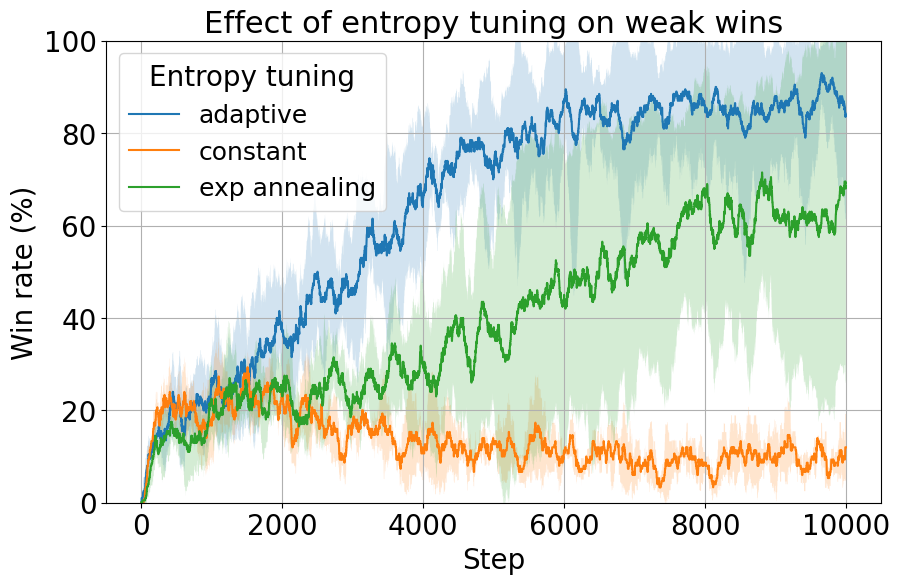

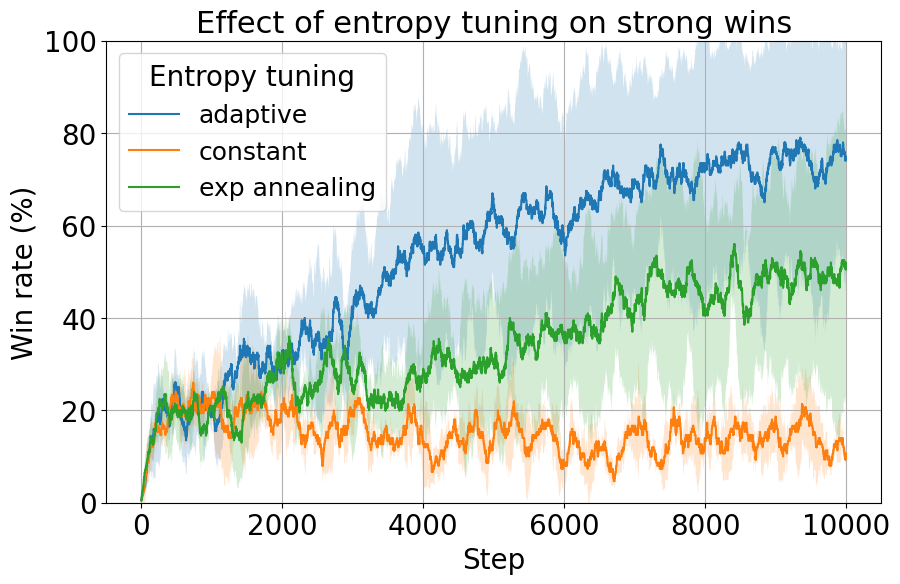

In [11]:
plot_mean_and_std(agg_weak_entropy, 'Effect of entropy tuning on weak wins', 'Step', 'Win rate (%)', 'Entropy tuning')
plot_mean_and_std(agg_strong_entropy, 'Effect of entropy tuning on strong wins', 'Step', 'Win rate (%)', 'Entropy tuning')


## Rewards

In [12]:
fixed_params = {'entropy_tuning': ['adaptive', 'exp annealing'],
                'tau': [0.005],}

df_weak_reward = get_fixed_params(df_weak_merged, fixed_params)
df_strong_reward = get_fixed_params(df_strong_merged, fixed_params)
print(df_weak_reward.shape)

(18, 10005)


In [13]:
agg_weak_reward = get_mean_and_std(df_weak_reward, [df_weak_reward['puck_closeness_reward_multiplier'], df_weak_reward['puck_not_touched_yet_reward']])
agg_strong_reward = get_mean_and_std(df_strong_reward, [df_strong_reward['puck_closeness_reward_multiplier'], df_strong_reward['puck_not_touched_yet_reward']])

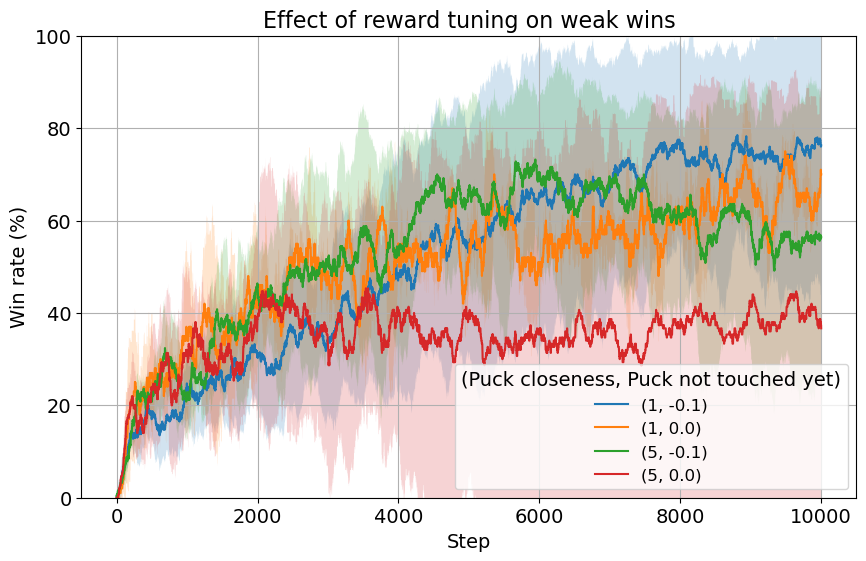

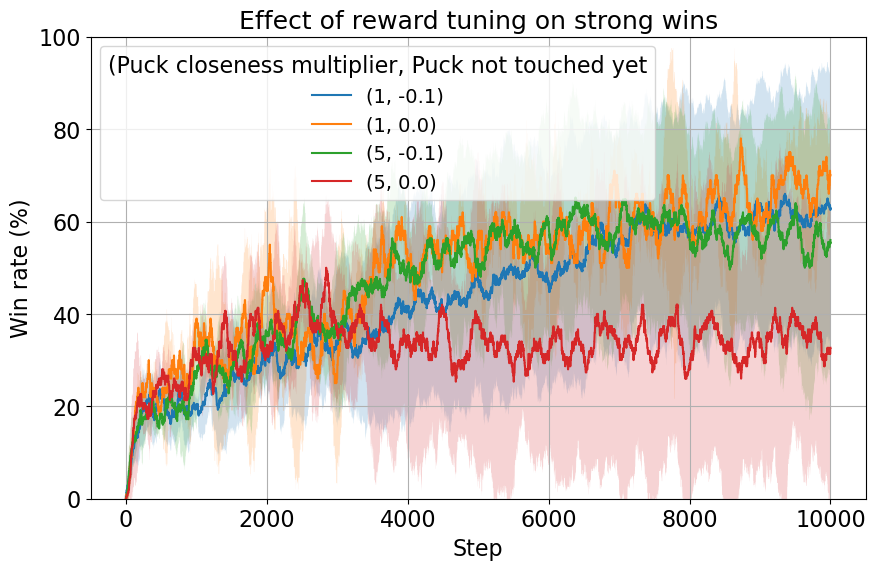

In [27]:
plot_mean_and_std(agg_weak_reward, "Effect of reward tuning on weak wins", "Step", "Win rate (%)", "(Puck closeness, Puck not touched yet)", fontsize=14)
plot_mean_and_std(agg_strong_reward, "Effect of reward tuning on strong wins", "Step", "Win rate (%)", "(Puck closeness multiplier, Puck not touched yet", fontsize=16)


## Soft vs hard update

In [15]:
fixed_params = {'entropy_tuning': ['adaptive']}

df_weak_update = get_fixed_params(df_weak_merged, fixed_params)
df_strong_update = get_fixed_params(df_strong_merged, fixed_params)
print(df_weak_update.shape)

(20, 10005)


In [16]:
agg_weak_update = get_mean_and_std(df_weak_update, [df_weak_update['tau']])
agg_strong_update = get_mean_and_std(df_strong_update, [df_weak_update['tau']])

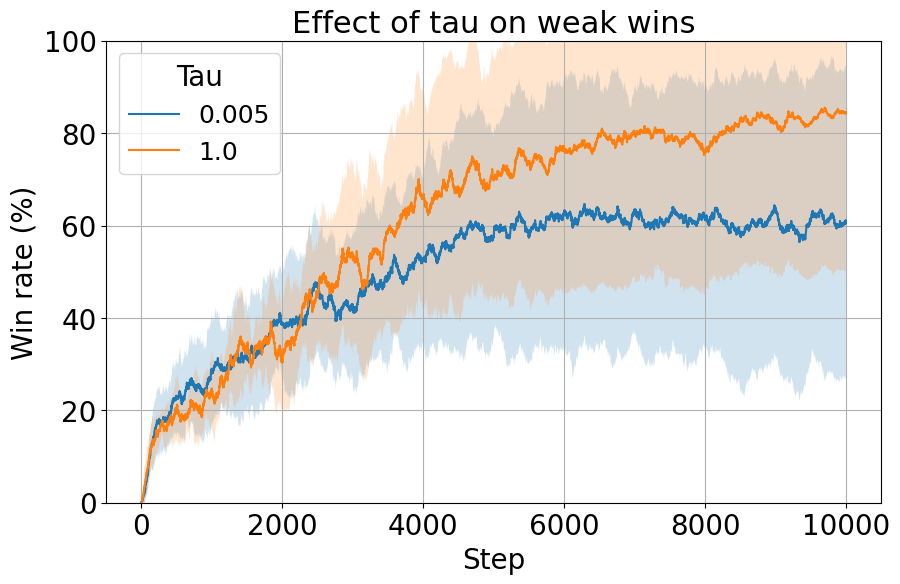

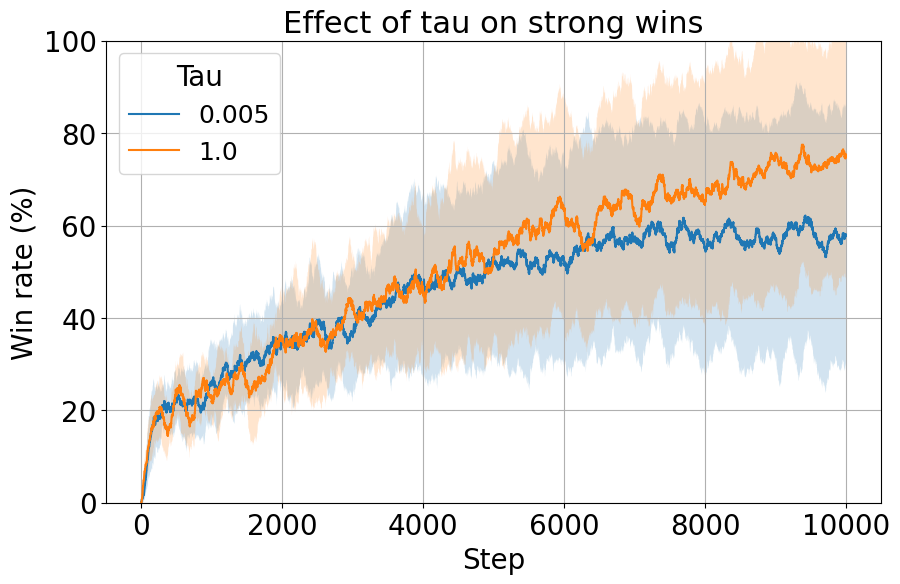

In [17]:
plot_mean_and_std(agg_weak_update, 'Effect of tau on weak wins', 'Step', 'Win rate (%)', 'Tau')
plot_mean_and_std(agg_strong_update, 'Effect of tau on strong wins', 'Step', 'Win rate (%)', 'Tau')


## Plot the 3 best results

In [18]:
fixed_params = {'Name': ['2025-02-10_12-56-20', "2025-02-18_23-51-21", "2025-02-18_23-51-27"]}
df_weak_best = get_fixed_params(df_weak_merged, fixed_params)
agg_weak_best = get_mean_and_std(df_weak_best, [df_weak_best['entropy_tuning']])

In [19]:
agg_weak_best

0         1              2                  3            \
               mean  std mean  std      mean      std      mean       std   
entropy_tuning                                                              
exp annealing   0.0  0.0  0.0  0.0  0.333333  0.57735  0.666667  1.154701   

                  4       ...       9995                 9996            \
               mean  std  ...       mean       std       mean       std   
entropy_tuning            ...                                             
exp annealing   1.0  1.0  ...  48.333333  2.081666  48.333333  2.081666   

                     9997                 9998                 9999            
                     mean       std       mean       std       mean       std  
entropy_tuning                                                                 
exp annealing   48.333333  2.081666  48.333333  2.081666  48.333333  2.081666  

[1 rows x 20000 columns]

In [20]:
agg_weak_best.keys()
mean_sac = np.array(agg_weak_best.xs('mean', axis=1, level=1)).squeeze() * 2
std_sac = np.array(agg_weak_best.xs('std', axis=1, level=1)).squeeze()

In [21]:
df_td3 = pd.read_csv(r"C:\Users\pmaty\Downloads\results_3_exp.csv")
mean_td3 = np.array(df_td3['mean']) * 100
std_td3 = np.array(df_td3['std']) * 100


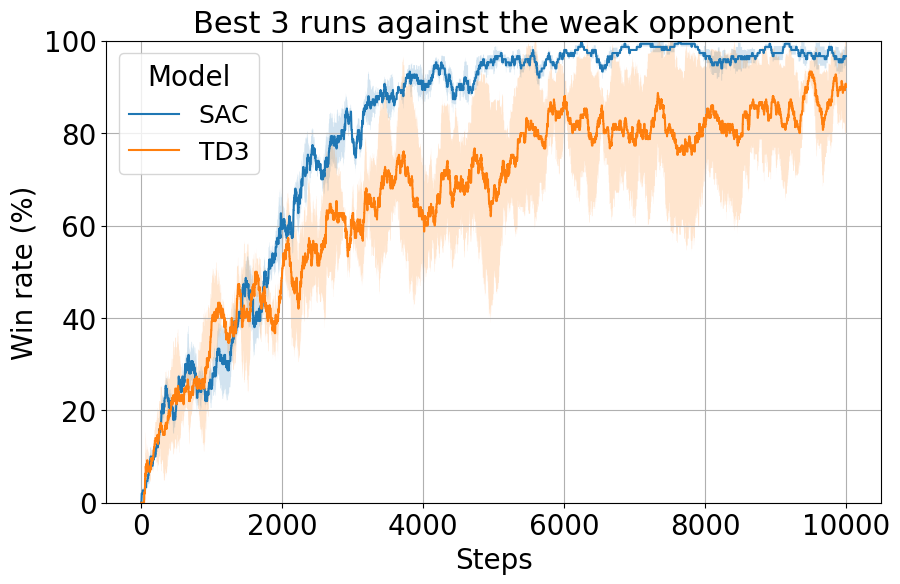

In [22]:
fontsize=20
plt.figure(figsize=(10, 6))

plt.plot(np.arange(0,10000), mean_sac, label=f"SAC")
plt.fill_between(np.arange(0,10000), mean_sac - std_sac, mean_sac + std_sac, alpha=0.2)

plt.plot(np.arange(0,10000), mean_td3, label=f"TD3")
plt.fill_between(np.arange(0,10000), mean_td3 - std_td3, mean_td3 + std_td3, alpha=0.2)

# y-axis limits
plt.ylim(0, 100)

# Customize the plot
plt.xlabel("Steps", fontsize=fontsize)
plt.ylabel("Win rate (%)", fontsize=fontsize)
title = "Best 3 runs against the weak opponent"
plt.title(title, fontsize=fontsize + 2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(title="Model", fontsize=fontsize - 2, title_fontsize=fontsize)
plt.grid(True)
save_path = f"plots/{title.replace(" ", "_")}.pdf"
plt.savefig(save_path, bbox_inches="tight", pad_inches=0)
plt.show()